## Plotting the temperature

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
weather = pd.read_csv("weather.csv")
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  8022 non-null   object 
 1   DATE     8022 non-null   object 
 2   AWND     4017 non-null   float64
 3   TAVG     1217 non-null   float64
 4   TMAX     8005 non-null   float64
 5   TMIN     7996 non-null   float64
 6   WT01     1777 non-null   float64
 7   WT02     221 non-null    float64
 8   WT03     227 non-null    float64
 9   WT04     119 non-null    float64
 10  WT05     360 non-null    float64
 11  WT06     25 non-null     float64
 12  WT07     79 non-null     float64
 13  WT08     404 non-null    float64
 14  WT09     69 non-null     float64
 15  WT10     2 non-null      float64
 16  WT11     3 non-null      float64
 17  WT13     1175 non-null   float64
 18  WT14     575 non-null    float64
 19  WT15     6 non-null      float64
 20  WT16     1326 non-null   float64
 21  WT17     12 no

In [19]:
weather[["TMIN", "TAVG", "TMAX"]].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


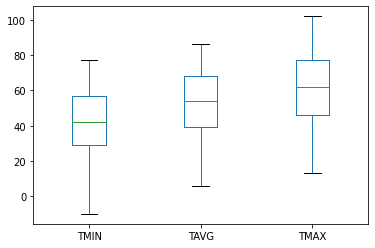

In [20]:
weather[["TMIN", "TAVG", "TMAX"]].plot(kind="box")

***

## Plotting the temperature difference

In [21]:
weather["TDIFF"] = weather["TMAX"] - weather["TMIN"]

In [22]:
weather["TDIFF"].describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

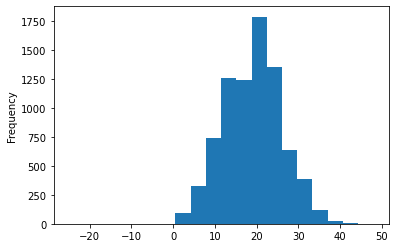

In [23]:
weather["TDIFF"].plot(kind="hist", bins=20)

***

## Counting bad weather conditions

In [24]:
WT = weather.loc[:, "WT01":"WT22"]

In [25]:
WT["bad_conditions"] = WT.sum(axis=1)

In [26]:
WT["bad_conditions"].value_counts()

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [27]:
WT["bad_conditions"] = WT.bad_conditions.fillna(0).astype("int")

In [28]:
WT["bad_conditions"]

0       0
1       0
2       0
3       0
4       0
       ..
8017    1
8018    0
8019    3
8020    2
8021    1
Name: bad_conditions, Length: 8022, dtype: int32

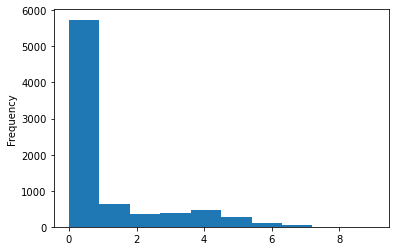

In [29]:
WT["bad_conditions"].plot(kind="hist")

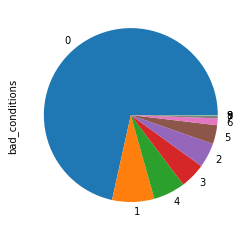

In [30]:
WT["bad_conditions"].value_counts().plot(kind="pie")

***

## Rating the weather conditions

In [31]:
WT["bad_conditions"].value_counts().sort_index()

0    5738
1     628
2     368
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [32]:
mapping = {0:"good", 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:"worse", 6:"worse", 7:"worse", 8:"worse", 9:"worse"}

In [33]:
WT["rating"] = WT["bad_conditions"].map(mapping)

In [34]:
WT["rating"]

0       good
1       good
2       good
3       good
4       good
        ... 
8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Name: rating, Length: 8022, dtype: object

In [35]:
WT["rating"].value_counts(dropna=False)

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

***

## Changing the data type to category

In [36]:
WT["rating"]

0       good
1       good
2       good
3       good
4       good
        ... 
8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Name: rating, Length: 8022, dtype: object

In [37]:
cats = ["good", "bad", "worse"]

In [38]:
WT["rating"] = pd.Categorical(WT["rating"], ordered=True, categories=cats)

In [39]:
WT["rating"].head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

In [40]:
WT.rating.min()

'good'

In [41]:
WT.rating.max()

'worse'

In [42]:
WT.rating.sort_values()

0        good
3832     good
3831     good
3830     good
3829     good
        ...  
4853    worse
4852    worse
4851    worse
4871    worse
4010    worse
Name: rating, Length: 8022, dtype: category
Categories (3, object): [good < bad < worse]

***

## Preparing the DataFrames

In [43]:
import pandas as pd

In [44]:
dosya = pd.read_csv("police.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [45]:
buyuk = pd.DataFrame(dosya)

In [46]:
ri = buyuk.sample(50000)

In [47]:
ri.drop(["county_name","state"], axis=1, inplace=True) 

In [48]:
ri.dropna(subset=["driver_gender"], inplace=True)

In [49]:
ri2 = ri.astype({"is_arrested" : "bool"}, copy=False)

In [50]:
ri2["is_arrested"].dtypes

dtype('bool')

In [51]:
combined = ri2.stop_date.str.cat(ri2.stop_time, sep = " ")

In [52]:
combined = pd.to_datetime(combined)

In [53]:
ri2["stop_datetime"] = combined

In [54]:
ri2.set_index("stop_datetime", inplace=True)

In [55]:
ri = ri2.reset_index()

In [56]:
weather["rating"] = WT["rating"]

In [57]:
weather_rating = weather[["DATE", "rating"]]

In [58]:
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


In [59]:
weather_rating.shape

(8022, 2)

In [61]:
weather_rating.DATE.nunique()

4017

***

## Merging the DataFrames

In [63]:
ri

,stop_datetime,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,2013-08-30 10:06:00,RI-2013-29732,2013-08-30,10:06,Zone K2,NaN,NaN,900,M,1974.0,...,False,NaN,NaN,False,Citation,False,30+ Min,False,False,Zone K2
1,2012-09-19 06:31:00,RI-2012-48424,2012-09-19,06:31,Zone K3,NaN,NaN,300,M,1975.0,...,False,NaN,NaN,False,Warning,False,0-15 Min,False,False,Zone K3
2,2011-03-29 13:39:00,RI-2011-09448,2011-03-29,13:39,Zone X3,NaN,NaN,200,F,1969.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X3
3,2012-06-16 18:19:00,RI-2012-32830,2012-06-16,18:19,Zone X4,NaN,NaN,500,M,1963.0,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X4
4,2007-05-01 11:15:00,RI-2007-19117,2007-05-01,11:15,Zone X3,NaN,NaN,200,M,1975.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47033,2011-04-02 09:33:00,RI-2011-09849,2011-04-02,09:33,Zone K3,NaN,NaN,300,M,1982.0,...,False,NaN,NaN,False,Citation,False,16-30 Min,True,False,Zone K3
47034,2009-10-10 22:51:00,RI-2009-35134,2009-10-10,22:51,Zone K3,NaN,NaN,300,F,1971.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3
47035,2012-11-29 08:39:00,RI-2012-57177,2012-11-29,08:39,Zone K2,NaN,NaN,900,M,1992.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K2
47036,2015-05-21 23:09:00,RI-2015-16411,2015-05-21,23:09,Zone X4,NaN,NaN,500,M,1959.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [64]:
weather_rating

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good
...,...,...
8017,2015-12-27,bad
8018,2015-12-28,good
8019,2015-12-29,bad
8020,2015-12-30,bad


In [65]:
ri.shape

(47038, 25)

In [66]:
weather_rating.shape

(8022, 2)

In [67]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on="stop_date", right_on="DATE", how="left")

In [68]:
ri_weather.shape

(93964, 27)

In [116]:
ri_weather.set_index("stop_datetime", inplace=True)

In [71]:
ri_weather.head()

,stop_datetime,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
0,2013-08-30 10:06:00,RI-2013-29732,2013-08-30,10:06,Zone K2,NaN,NaN,900,M,1974.0,...,NaN,False,Citation,False,30+ Min,False,False,Zone K2,2013-08-30,good
1,2013-08-30 10:06:00,RI-2013-29732,2013-08-30,10:06,Zone K2,NaN,NaN,900,M,1974.0,...,NaN,False,Citation,False,30+ Min,False,False,Zone K2,2013-08-30,bad
2,2012-09-19 06:31:00,RI-2012-48424,2012-09-19,06:31,Zone K3,NaN,NaN,300,M,1975.0,...,NaN,False,Warning,False,0-15 Min,False,False,Zone K3,2012-09-19,good
3,2012-09-19 06:31:00,RI-2012-48424,2012-09-19,06:31,Zone K3,NaN,NaN,300,M,1975.0,...,NaN,False,Warning,False,0-15 Min,False,False,Zone K3,2012-09-19,bad
4,2011-03-29 13:39:00,RI-2011-09448,2011-03-29,13:39,Zone X3,NaN,NaN,200,F,1969.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X3,2011-03-29,good


***

## Comparing arrest rates by weather rating

In [72]:
ri_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93964 entries, 0 to 93963
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   stop_datetime          93964 non-null  datetime64[ns]
 1   id                     93964 non-null  object        
 2   stop_date              93964 non-null  object        
 3   stop_time              93964 non-null  object        
 4   location_raw           93964 non-null  object        
 5   county_fips            0 non-null      float64       
 6   fine_grained_location  0 non-null      float64       
 7   police_department      93964 non-null  object        
 8   driver_gender          93964 non-null  object        
 9   driver_age_raw         93964 non-null  float64       
 10  driver_age             93634 non-null  float64       
 11  driver_race_raw        93964 non-null  object        
 12  driver_race            93964 non-null  object        
 13  v

In [61]:
ri_weather["is_arrested"].mean()*100

3.454466267965455

In [65]:
ri_weather.groupby("rating").mean()[["is_arrested"]]*100

,is_arrested
rating,
good,3.357027
bad,3.666527
worse,3.968834


In [74]:
ri_weather.groupby(["rating", "violation"]).mean()[["is_arrested"]]*100

is_arrested
rating violation                       
good   Equipment               5.789882
       Moving violation        5.645289
       Other                   8.827086
       Registration/plates     7.259259
       Seat belt               2.666667
       Speeding                1.194365
bad    Equipment               6.243349
       Moving violation        5.220188
       Other                   7.757805
       Registration/plates    10.262258
       Seat belt               2.380952
       Speeding                1.235917
worse  Equipment               9.424084
       Moving violation        4.305043
       Other                   6.344411
       Registration/plates     5.917160
       Seat belt               0.000000
       Speeding                1.770276

In [75]:
ri_weather.groupby(["violation", "rating"]).mean()[["is_arrested"]]*100

is_arrested
violation           rating             
Equipment           good       5.789882
                    bad        6.243349
                    worse      9.424084
Moving violation    good       5.645289
                    bad        5.220188
                    worse      4.305043
Other               good       8.827086
                    bad        7.757805
                    worse      6.344411
Registration/plates good       7.259259
                    bad       10.262258
                    worse      5.917160
Seat belt           good       2.666667
                    bad        2.380952
                    worse      0.000000
Speeding            good       1.194365
                    bad        1.235917
                    worse      1.770276

In [76]:
arrest_rate = ri_weather.groupby(["violation", "rating"]).mean()["is_arrested"]*100

***

## Selecting From a mult-indexed Series

In [87]:
arrest_rate

violation            rating
Equipment            good       5.789882
                     bad        6.243349
                     worse      9.424084
Moving violation     good       5.645289
                     bad        5.220188
                     worse      4.305043
Other                good       8.827086
                     bad        7.757805
                     worse      6.344411
Registration/plates  good       7.259259
                     bad       10.262258
                     worse      5.917160
Seat belt            good       2.666667
                     bad        2.380952
                     worse      0.000000
Speeding             good       1.194365
                     bad        1.235917
                     worse      1.770276
Name: is_arrested, dtype: float64

In [88]:
arrest_rate["Moving violation"]["bad"]

5.220188025729837

In [89]:
arrest_rate.xs(("Moving violation", "bad"))

5.220188025729837

In [90]:
arrest_rate.xs("Speeding", level=0)

rating
good     1.194365
bad      1.235917
worse    1.770276
Name: is_arrested, dtype: float64

In [92]:
arrest_rate.loc["Moving violation", "bad"]

5.220188025729837

In [93]:
arrest_rate.loc["Speeding"]

rating
good     1.194365
bad      1.235917
worse    1.770276
Name: is_arrested, dtype: float64

***

## Reshaping the arrest rate data

In [112]:
arrest_rate.unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
rating,,,,,,
good,6.013843,5.423566,7.710843,8.550053,2.814758,1.357854
bad,6.256481,5.883801,8.309726,10.056497,3.633218,1.420030
worse,11.658031,7.024266,3.651685,14.457831,0.000000,1.077944


In [122]:
pd.pivot_table(ri_weather, values="is_arrested", index="rating", columns="violation", aggfunc=np.mean) * 100

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
rating,,,,,,
good,5.793596,5.425334,8.338209,8.363505,2.250296,1.436031
bad,5.781585,5.366683,9.686347,10.076670,2.610114,1.305085
worse,9.189189,5.882353,7.397260,8.823529,0.000000,1.381552


In [94]:
ri_weather.pivot_table(values="is_arrested", index="violation", columns="rating")

rating,good,bad,worse
violation,,,
Equipment,0.057899,0.062433,0.094241
Moving violation,0.056453,0.052202,0.043050
Other,0.088271,0.077578,0.063444
Registration/plates,0.072593,0.102623,0.059172
Seat belt,0.026667,0.023810,0.000000
Speeding,0.011944,0.012359,0.017703
